In [44]:
import pandas as pd

In [45]:
data = pd.read_excel(r'E:\ExcelR ass\Forecasting\Airlines+Data.xlsx')
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [46]:
print(data.info())
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB
None


Month         0
Passengers    0
dtype: int64

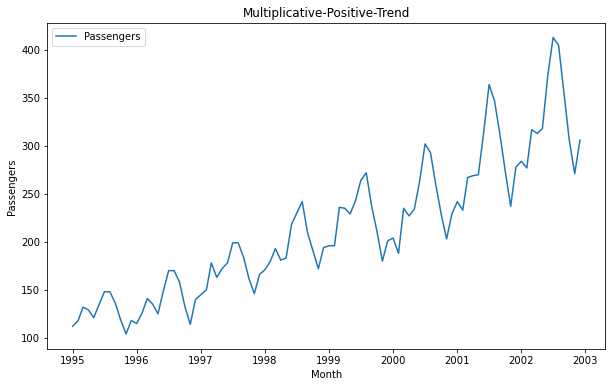

In [47]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(10,6))
plt.plot(data["Month"], data["Passengers"], label="Passengers")
plt.title("Multiplicative-Positive-Trend")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.legend()

Text(0.5, 1.0, 'Monthly Distribution of Passengers data')

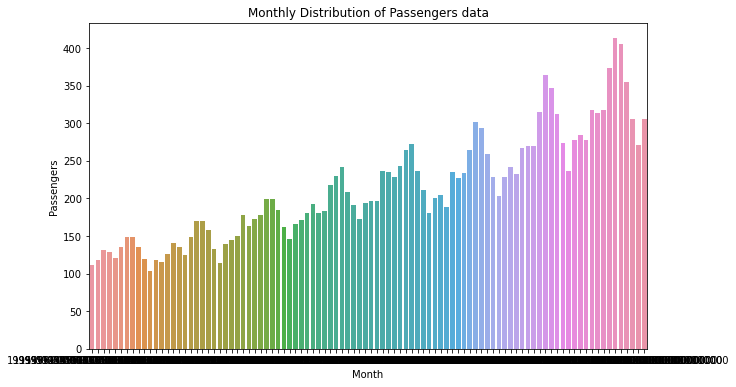

In [48]:
import seaborn as sns
fig = plt.subplots(figsize=(10,6))
sns.barplot(x=data["Month"], y=data["Passengers"])
plt.title("Monthly Distribution of Passengers data")

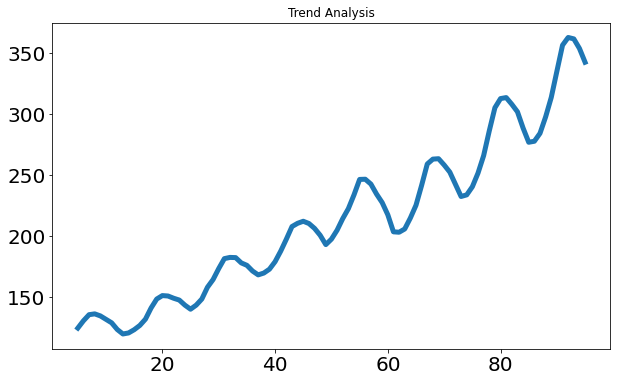

In [49]:
# Trend :
data["Passengers"].rolling(6).mean().plot(figsize=(10,6), linewidth=5, fontsize=20)
plt.title("Trend Analysis")
plt.show()

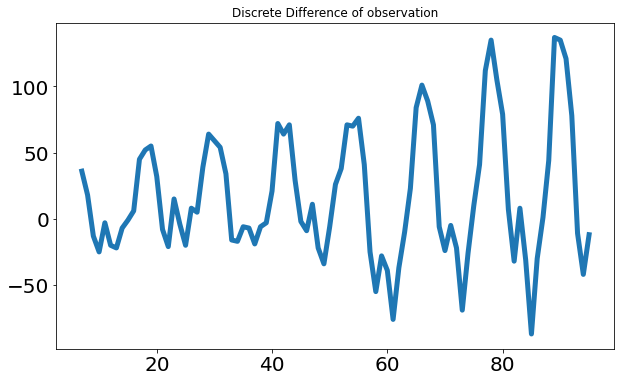

In [50]:
data["Passengers"].diff(periods=7).plot(figsize=(10,6), linewidth=5, fontsize=20)
plt.title("Discrete Difference of observation")
plt.show()

In [51]:
data["Month"] = pd.to_datetime(data.Month,format="%y-%b")

In [52]:
# Extract months to get variance :
data["month_count"] = data.Month.dt.strftime("%b")

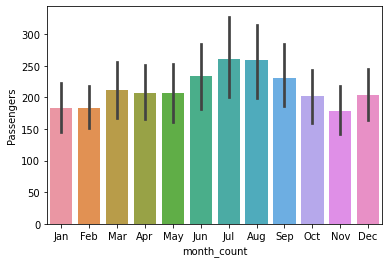

In [53]:
# month wise distribution for passengers data :
sns.barplot(x = 'month_count', y = 'Passengers', data = data)
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

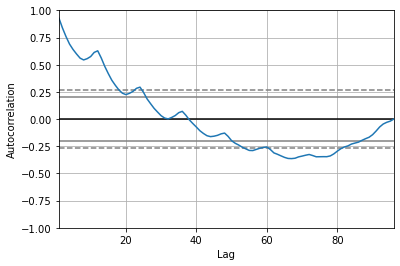

In [54]:
# ACF plot :
pd.plotting.autocorrelation_plot(data["Passengers"])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

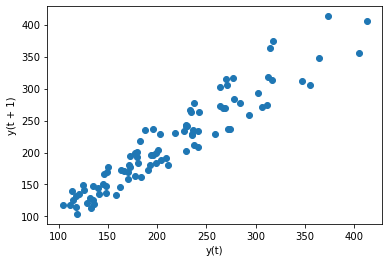

In [55]:
# LAG plot :
pd.plotting.lag_plot(data["Passengers"])

<AxesSubplot:xlabel='month_count', ylabel='Passengers'>

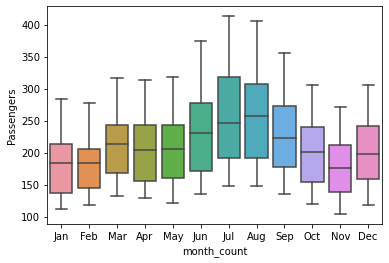

In [56]:
# Monthlly distribution of Passengers :
sns.boxplot(x="month_count",y="Passengers",data=data)

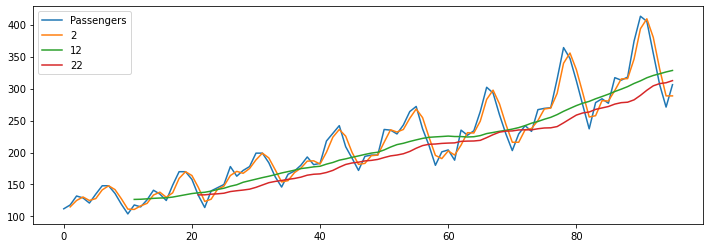

In [57]:
# Moving Average ;
plt.figure(figsize=(12,4))
data.Passengers.plot(label="Passengers")
for i in range(2,24,10):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [58]:
# ARIMA :
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data.Passengers, order=(1,1,1))
model_fit = model.fit(disp=0)

C:\Users\mites\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\mites\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

In [59]:
# Summary of model :
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   95
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -427.813
Method:                       css-mle   S.D. of innovations             21.536
Date:                Tue, 16 Feb 2021   AIC                            863.627
Time:                        08:48:31   BIC                            873.842
Sample:                             1   HQIC                           867.755
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.2914      0.266      8.601      0.000       1.769       2.814
ar.L1.D.Passengers     0.7248      0.073      9.898      0.000       0.581       0.868
ma.L1.D.Passengers    -1.0000      0.028    -36.363      0.000      -1.054      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3797           +0.0000j            1.3797            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [60]:
# Get Root-Mean-Squared-Error for ARIMA model :
import numpy as np
residual = pd.DataFrame(model_fit.resid)
rmse = np.mean(((residual)**2)**0.5)
rmse

0    16.950775
dtype: float64

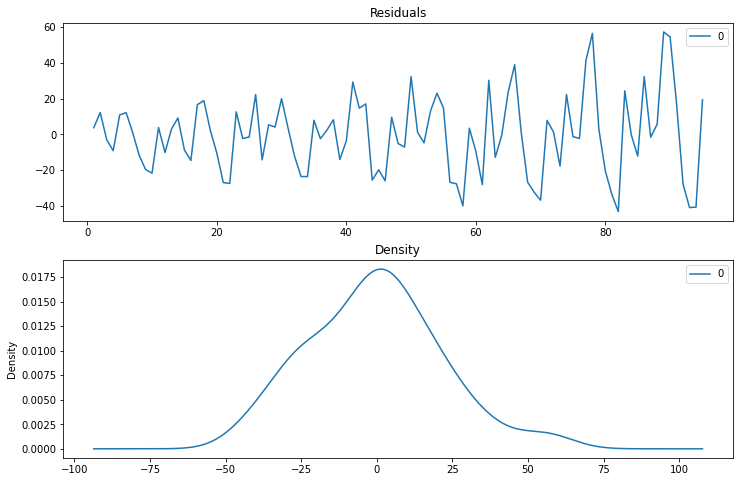

In [61]:
# Residual plot & Density of Residuals :
fig, ax = plt.subplots(2,1, figsize=(12,8))
residual.plot(title="Residuals", ax=ax[0])
residual.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

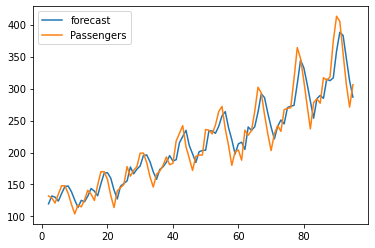

In [64]:
# prediction :
model_fit.plot_predict()
plt.show()

In [65]:
# split data :
train = data.Passengers[0:83]
test = data.Passengers[83:]

In [72]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

C:\Users\mites\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\mites\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

In [73]:
# forecast sales value :
forecast, se, conf = fitted.forecast(13, alpha=0.05)

In [74]:
# make series to form graph :
fc_series = pd.Series(forecast, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

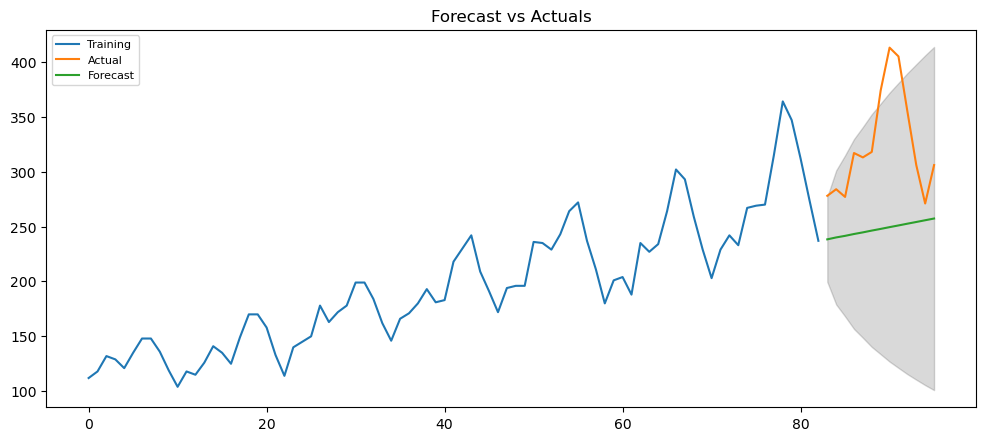

In [75]:
# Plot forecasting vs actual graph :
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [76]:
# get rmse and acf value for testing :
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # Root mean squared error
    acf1 = acf(forecast-test)                     # Auto correlation function
    return({ 'rmse':rmse, 'acf1':acf1 
            })

forecast_accuracy(forecast, test.values)

C:\Users\mites\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\mites\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'rmse': 88.64120066512193,
 'acf1': array([ 1.        ,  0.69551136,  0.16926329, -0.26822988, -0.43325369,
        -0.41369391, -0.33775015, -0.23381547, -0.08797987,  0.0936816 ,
         0.15541516,  0.12149124,  0.03936033])}

In [77]:
# SARIMA model :
import statsmodels.api as sm
mod = sm.tsa.SARIMAX(data["Passengers"], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -307.047
Date:                              Tue, 16 Feb 2021   AIC                            620.094
Time:                                      08:55:38   BIC                            627.350
Sample:                                           0   HQIC                           623.009
                                               - 96                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1455      0.446     -0.327      0.744      -1.019       0.728
ma.S.L12      -0.12

In [78]:
sarima_rmse = np.mean(((results.resid)**2)**0.5)
sarima_rmse

9.536128100818852

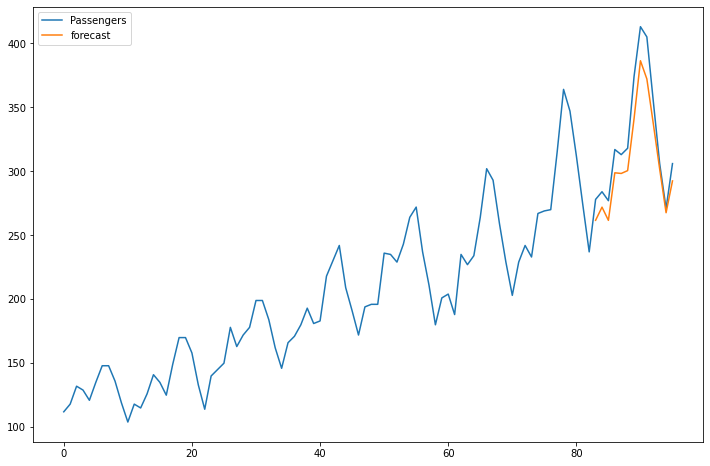

In [79]:
data['forecast'] = results.predict(start = 83, end=96 , dynamic= True)  
data[['Passengers', 'forecast']].plot(figsize=(12, 8))
plt.show()


In [ ]:
# Therefor, after calculating rmse for different models we can conclude that SARIMA model performing on whole
# Passengers value gives us lesser rmse is good model compare to model with ARIMA model with -1 dispersion and applying on training data.
# ans rmse from ARIMA model with 0 dispersion on whole Passengers data gives higher rmse compare to SARIMA.

# Therefor, SARIMA model is good compare to others.